# __CV19API__

_Covid-19 API from [Lancaster Beer and Code](https://lbandc.github.io/2020/04/14/project-cv19api.html)_

This API aggregates the daily report from the NHS detailing Covid-19 related deaths in the UK, accurately detailing the numbers broken down by:
- Date
- Region
- Trust

## Motivation

We discovered from reading [this Reddit post](https://www.reddit.com/r/ukpolitics/comments/fykikm/nhs_england_data_broken_down_for_deaths_by_day/) that the Covid-19 related deaths reported in the media were a bit misleading. They would report the deaths _reported_ that day, rather than the _actual_ deaths that day. 

This is understandable because not all deaths are reported in time. However, it is not ideal for tracking what is actually happening. The solution presented in this API is to aggregate all [released NHS spreadsheets](https://www.england.nhs.uk/statistics/) in once place. 

This notebook will detail how to use this very simple API

## Basic Documentation

API Base URL: `https://api.cv19api.com/api/v1`

__Endpoints__

- `/deaths` - accumulated death numbers grouped by day
- `/deaths/regions` - grouped by NHS Region
- `/deaths/trusts` - grouped by NHS Trust 

__String Query Parameters__

All dates are in _ISO8601_ Format: `YYYY-MM-DD`

- `to` - Start ground truth date
- `from` - End ground truth date 
- `recordedOnTo` - Start reported date
- `recordedOnFrom` - End reported date

#### Examples

Counts of deaths from `2020-03-17` to `2020-04-13`

`https://api.cv19api.com/api/v1/deaths/?from=2020-03-17&to=2020-04-13`

Will yield:

```
{'data': [{'date': '2020-04-12', 'deaths': 118},
  {'date': '2020-04-11', 'deaths': 443},
  {'date': '2020-04-10', 'deaths': 516},
  {'date': '2020-04-09', 'deaths': 611},
  ...
 'metaData': {'from': '2020-03-18',
  'recordedOnFrom': '2020-03-17',
  'recordedOnTo': '2020-04-13',
  'to': '2020-04-17'}}
  ```

---

`https://api.cv19api.com/api/v1/deaths/?recordedOnFrom=2020-03-17&recordedOnTo=2020-04-13`

Will yield:

```
{'data': [{'date': '2020-04-13', 'deaths': 566},
  {'date': '2020-04-12', 'deaths': 610},
  {'date': '2020-04-11', 'deaths': 671},
  {'date': '2020-04-10', 'deaths': 641},
  ...
 'metaData': {'from': '2020-03-17',
  'recordedOnFrom': '2020-01-01',
  'recordedOnTo': '2020-04-17',
  'to': '2020-04-13'}}
  ```

---

`https://api.cv19api.com/api/v1/deaths/trusts/?from=2020-03-17&to=2020-04-13`


Will yield:

```
{'data': [{'date': '2020-04-13',
   'deaths': 1,
   'trust': 'AIREDALE NHS FOUNDATION TRUST'},
  {'date': '2020-04-13',
   'deaths': 2,
   'trust': 'ANGLIAN COMMUNITY ENTERPRISE CIC - CLACTON HOSPITAL'},
  {'date': '2020-04-13',
   'deaths': 3,
   'trust': "ASHFORD AND ST PETER'S HOSPITALS NHS FOUNDATION TRUST"},
  ...],
 'metaData': {'from': '2020-03-17',
  'recordedOnFrom': '2020-01-01',
  'recordedOnTo': '2020-04-17',
  'to': '2020-04-13'}}
  ```

---

`https://api.cv19api.com/api/v1/deaths/regions/?from=2020-03-17&to=2020-04-13`


Will yield:

  ```
{'data': [{'date': '2020-04-13', 'deaths': 199, 'region': 'EAST_OF_ENGLAND'},
  {'date': '2020-04-13', 'deaths': 98, 'region': 'MIDLANDS'},
  {'date': '2020-04-13', 'deaths': 81, 'region': 'NORTH_EAST_AND_YORKSHIRE'},
  {'date': '2020-04-13', 'deaths': 102, 'region': 'NORTH_WEST'},
  {'date': '2020-04-13', 'deaths': 62, 'region': 'SOUTH_EAST'},
  {'date': '2020-04-13', 'deaths': 24, 'region': 'SOUTH_WEST'},
  {'date': '2020-04-12', 'deaths': 221, 'region': 'EAST_OF_ENGLAND'},
  ...],
 'metaData': {'from': '2020-03-17',
  'recordedOnFrom': '2020-01-01',
  'recordedOnTo': '2020-04-17',
  'to': '2020-04-13'}}
  ```


In [0]:
import requests
import datetime
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
from urllib.parse import urlencode

plt.rcParams['figure.figsize'] = [15, 7]

In [0]:
def api_client(date_from=None, date_to=None, recorded_on_from=None, recorded_on_to=None, to_df=True, verbose=False):
  items = {"from": date_from, "to": date_to, "recordedOnFrom": recorded_on_from, "recordedOnTo": recorded_on_to}
  query_string = urlencode({k: v for k, v in items.items() if v is not None})
  
  base_url = 'https://api.cv19api.com/api/v1/deaths'
  if query_string:
    base_url = base_url + "?" + query_string
  if verbose:
    print(f"GET {base_url}")
  r = requests.get(base_url)

  if to_df:
    df = pd.DataFrame(r.json()['data'])
    df = df.sort_values(by='date')
    df['date'] = pd.to_datetime(df['date'])
    return df
  else:
    return r.json()['data']

# Death figures by the actual day they occurred

We can grab these quite simply from the API by providing a from and to range (or not providing any parameters). Let's see what that looks like.

GET https://api.cv19api.com/api/v1/deaths?from=2020-03-17&to=2020-04-13

JSON data Snippet:
 [{'date': '2020-04-13', 'deaths': 566}, {'date': '2020-04-12', 'deaths': 610}, {'date': '2020-04-11', 'deaths': 671}]

DF Snippet:
          date  deaths
27 2020-03-17       1
26 2020-03-18       6
25 2020-03-19       7
24 2020-03-20      16
23 2020-03-21      21


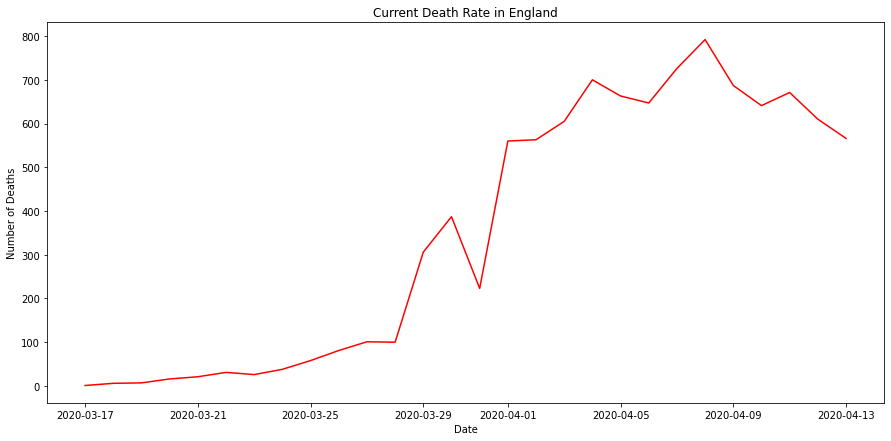

In [57]:
date_from, date_to = '2020-03-17', '2020-04-13'
jn = api_client(date_from=date_from, date_to=date_to, to_df=False, verbose=True)
print('\nJSON data Snippet:\n', jn[:3])
df = api_client(date_from=date_from, date_to=date_to)
print('\nDF Snippet:\n', df.head())
plt.plot_date(df['date'], df['deaths'], fmt='-', color='r')
plt.title('Current Death Rate in England')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

###That's a weird shape. Why is that?

It's because we only have data from the 2nd April onwards. 

###But we have data stretching back into March?

Yes, that's because the deaths didn't all occur on the day they were reported - some of them were the day before, some the day before that, and so on. This means if you just look at the number of deaths reported, you won't actually know what days the deaths occurred on. Your graph would be all wrong!

# Distribution of when deaths occurred by reporting date

First things first, we need to grab the data from the API. We load this in to a list of basic dataframes.

In this case, we are going to fetch deaths *by the date they were reported, not the date they occurred*. This is how deaths are usually reported in the media, but it is not very useful for actually understanding how many deaths happened on a given day. 



In [60]:
frames = []

def crunch_days_since(df):
  df['days_since'] = (df['date'].max() - df['date']).dt.days
  return df

dates = [f"2020-04-{day:02}" for day in range(2,13)]
frames = [api_client(recorded_on_from=date, recorded_on_to=date, verbose=True) for date in dates]
frames = [crunch_days_since(d) for d in frames]

GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-02&recordedOnTo=2020-04-02
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-03&recordedOnTo=2020-04-03
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-04&recordedOnTo=2020-04-04
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-05&recordedOnTo=2020-04-05
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-06&recordedOnTo=2020-04-06
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-07&recordedOnTo=2020-04-07
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-08&recordedOnTo=2020-04-08
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-09&recordedOnTo=2020-04-09
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-10&recordedOnTo=2020-04-10
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-11&recordedOnTo=2020-04-11
GET https://api.cv19api.com/api/v1/deaths?recordedOnFrom=2020-04-12&recordedOnTo

To start with, let's compare the total deaths by the day they occurred with the totals reported

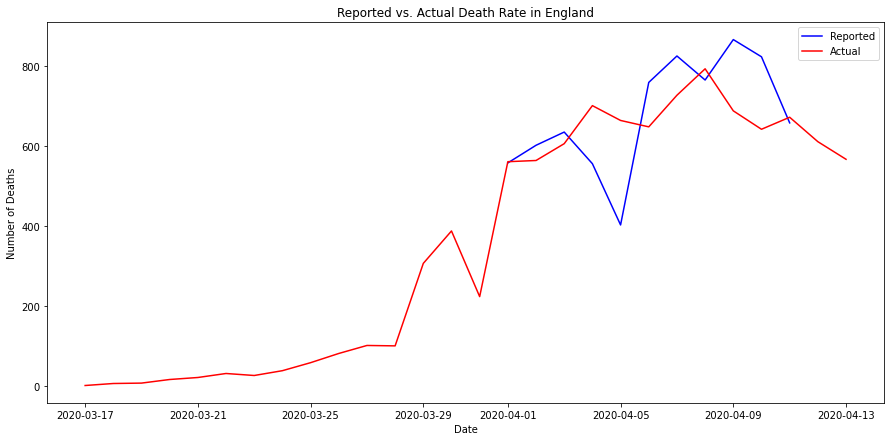

In [61]:
reported = [{'date': df['date'].max(), 'deaths': df['deaths'].sum()} for df in frames]

dfr = pd.DataFrame(reported)
dfr = dfr.sort_values(by='date')
dfr['date'] = pd.to_datetime(dfr['date'])

plt.plot_date(dfr['date'], dfr['deaths'], fmt='-', color='b')
plt.plot_date(df['date'], df['deaths'], fmt='-', color='r')
plt.legend(['Reported', 'Actual'])
plt.title('Reported vs. Actual Death Rate in England')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

Interesting no? The reported figure both over and underestimates by values in the order of hundreds of deaths

**But** that is too strong a statement to make, unless we understand the *distribution* of the actual time of these deaths relative to when they are reported.

We then want to standardise these based around the days since the death occurred, to make it invariant of any specific date.

In [0]:
def resample(df, max_since):
  df.drop('date', axis=1, inplace=True)
  df.set_index('days_since', inplace=True)
  return df.reindex(list(range(0,max_since+1))).fillna(0)

max_since = max([d['days_since'].max() for d in frames])
resampled = [resample(d.copy(), max_since) for d in frames]

To see what I mean, let's take a look at the distributions of when the reported deaths actually occurred relative to the day of reporting.

The graphs below show on the X axis the number of days since the reported death occurred. The Y axis shows the percentage of reported deaths falling into each bucket.

You can see that in general only about 20-50% of reported deaths actually happened the day before. The remainder are in a long tail, stretching back as far as 23 days in some cases!

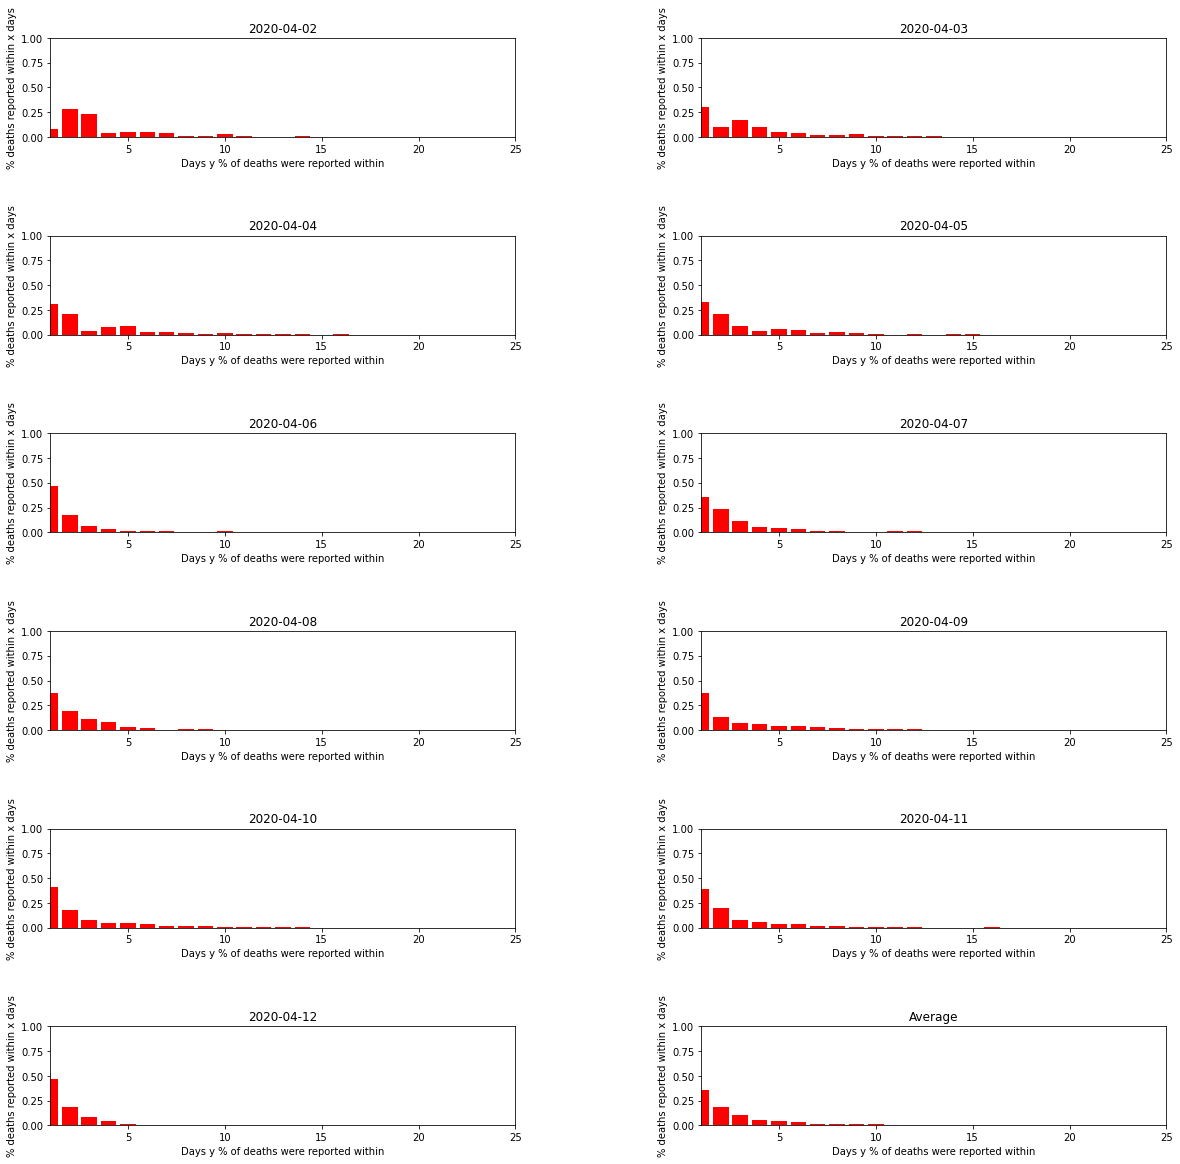

In [73]:
fig = plt.figure(figsize=[20, 20])
fig.subplots_adjust(hspace=1, wspace=0.4)

def plot_bar(ax, df, title):
  ax.bar(df.index, df['deaths']/df['deaths'].sum(), color='r')
  plt.title(title)
  plt.ylim(0,1)
  plt.xlim(1,25)
  plt.ylabel("% deaths reported within x days")
  plt.xlabel("Days y % of deaths were reported within")

for idx, df in enumerate(resampled):
  date = dates[idx]
  ax = fig.add_subplot(6, 2, idx+1)
  plot_bar(ax, df, date)

ax = fig.add_subplot(6, 2, 12)
mean_distribution = pd.concat(resampled, axis=1).mean(axis=1).to_frame('deaths')
plot_bar(ax, mean_distribution, "Average")

plt.show()

### What does this mean?

It means that the *actual* daily figures aren't likely to be truly accurate until enough time has passed for all the deaths to be reported.

### How long until they're accurate?

I'm glad you asked. We can estimate this from the above distributions!

Let's take another look at the average arrival distribution. We will assume for the purposes of this example that it is static over time (it isn't, but it won't matter too much here)

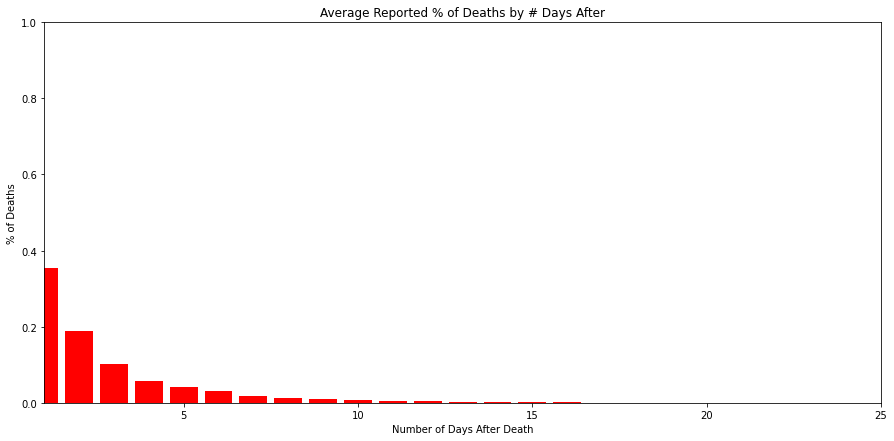

In [76]:
plot_bar(plt.gca(), mean_distribution, "Average")
plt.title('Average Reported % of Deaths by # Days After')
plt.xlabel('Number of Days After Death')
plt.ylabel('% of Deaths')
plt.show()

So instead of asking how long to wait until the data is correct, we can instead ask something like "How long do we have to wait until the data is probably within 5% of the real total"? Well, each bar on this chart represents the probability that a death was reported within `x` days of happening. Because they're probabilities, we know that they sum to 1...

This means, if we go from the left of the x axis, summing the probabilities until we reach 95%, we have our (approximate) answer!

In [69]:
import numpy as np
mean_distribution['probability'] = mean_distribution['deaths'] / mean_distribution['deaths'].sum()
cumsum = np.cumsum(mean_distribution['probability'])
cumsum

days_since
0     0.153919
1     0.509074
2     0.698884
3     0.800645
4     0.858449
5     0.900524
6     0.931846
7     0.948918
8     0.962495
9     0.972308
10    0.980374
11    0.986020
12    0.991531
13    0.994085
14    0.996370
15    0.997311
16    0.998521
17    0.999059
18    0.999193
19    0.999462
20    1.000000
Name: probability, dtype: float64

In [70]:
for interval in np.arange(.95, .15, -.1):
  print(f'You would have to wait {np.where(cumsum > interval)[0][0]} days after the date to be confident any given day\'s figure is within {round(100*(1-interval))}% of the real total')

You would have to wait 8 days after the date to be confident any given day's figure is within 5.0% of the real total
You would have to wait 4 days after the date to be confident any given day's figure is within 15.0% of the real total
You would have to wait 3 days after the date to be confident any given day's figure is within 25.0% of the real total
You would have to wait 2 days after the date to be confident any given day's figure is within 35.0% of the real total
You would have to wait 2 days after the date to be confident any given day's figure is within 45.0% of the real total
You would have to wait 1 days after the date to be confident any given day's figure is within 55.0% of the real total
You would have to wait 1 days after the date to be confident any given day's figure is within 65.0% of the real total
You would have to wait 1 days after the date to be confident any given day's figure is within 75.0% of the real total


And there we have it, we can comfortably say that we can assume that we have mostly accurate knowledge after 8 days. 

Reporting data as it is released is good, however, it must be taken with a grain of salt. It is a good estimation, but we must wait a few days to have a fuller picture of things.